In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df = pd.read_csv("/kaggle/input/fetal-health-classification/fetal_health.csv")
df.info()

# No null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [3]:
df.fetal_health.unique()

# From data page, target feature is "fetal_health" with the following values:
# 1: Normal
# 2: Suspect
# 3: Pathological

array([2., 1., 3.])

In [4]:
df.describe()

# None of the outliers seem impossible or egregious
# (at least numerically, maybe I don't know enough about fetal health to say for certain)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [5]:
# Clean up fetal_health classification to 0, 1, 2

features = df.drop(['fetal_health'], axis=1)
target = df['fetal_health'].apply(lambda x: int(x-1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, test_size=0.25, 
                                                    random_state=23)

lr = LogisticRegression(max_iter = 100000, random_state=23)
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       422
           1       0.60      0.51      0.55        69
           2       0.81      0.73      0.77        41

    accuracy                           0.88       532
   macro avg       0.78      0.73      0.75       532
weighted avg       0.87      0.88      0.88       532

0.8796992481203008


In [7]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=23, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))

# Just from testing different models, it seems that XGB performs the best

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       422
           1       0.93      0.81      0.87        69
           2       0.95      0.90      0.92        41

    accuracy                           0.96       532
   macro avg       0.95      0.90      0.93       532
weighted avg       0.96      0.96      0.96       532

0.9642857142857143


<Axes: >

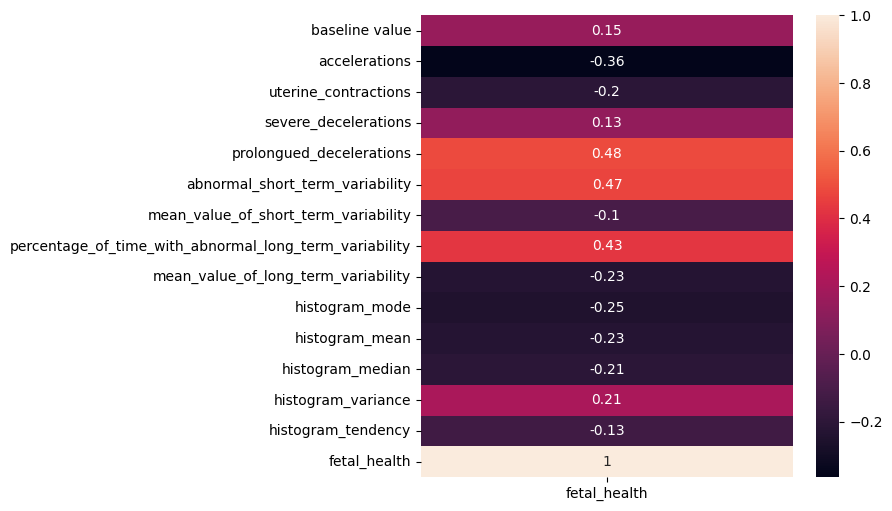

In [8]:
plt.figure(figsize=(6,6))
dfcorr = df.corr()
dfcorr = dfcorr[np.absolute(dfcorr) > 0.1]
dfcorrt = pd.DataFrame(dfcorr['fetal_health'])
dfcorrt.dropna(axis='index', inplace=True)
sns.heatmap(dfcorrt,cbar=True,annot=True)

In [9]:
bestfeatures = list(dfcorrt.index)[:-1]
X_train, X_test, y_train, y_test = train_test_split(df[bestfeatures], 
                                                    target, test_size=0.25, 
                                                    random_state=23)

xgb_clf = xgb.XGBClassifier(learning_rate=0.5, random_state=23, use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       422
           1       0.92      0.81      0.86        69
           2       0.93      0.93      0.93        41

    accuracy                           0.96       532
   macro avg       0.94      0.91      0.92       532
weighted avg       0.96      0.96      0.96       532

0.9605263157894737
